*GROUP : PARAKEET*

**HUMAN BEHAVIOR ANALYSIS**
---
DATASET : MERLSense Laboratories


### **IMPORTING LIBRARIES**

In [ ]:
#Data Processing and Handling Libraries
import pandas as pd
import numpy as np

In [ ]:
# Model Development and Topic Modelling Libraries
import gensim
from gensim import corpora, models, similarities
from collections import OrderedDict

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#import pyLDAvis.gensim

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **IMPORTING DATASET**

In [ ]:
#Data being huge is size was stored on drive and accessed through Google Colaboratory. 
#Below Code block is used to extract files from Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### **PER DAY PER SENSOR DOCUMENT FORMATION**

In [ ]:
import os
import glob

# Step 1: Get a list of all text files in target directory
my_dir = '/content/drive/My Drive/PARAKEETS/PDPS_New/Per Day Per Sensor/'     # path to the home directory
filelist = []
os.chdir( my_dir )

# Step 2: Build up list of files:
for files in glob.glob("*.txt"):
    fileName, fileExtension = os.path.splitext(files)
    filelist.append(fileName)                                                 # filename without extension 


In [ ]:
filelist[0]

'14-07-06 303'

In [ ]:
# All the text files are stored with their filenames as key and file content as value in the dictionary

datafiles = {} 
temp = {} 

for file_name in filelist:                                                    # loop over filelist
      temp[file_name] =pd.read_csv('/content/drive/My Drive/PARAKEETS/PDPS_New/Per Day Per Sensor/'+file_name+'.txt',sep=',', header=None)
      datafiles[str(file_name)]=temp[file_name][1:][10].values.tolist()


In [ ]:
len(datafiles)

5636

### **DATA COMPILATION**

In [ ]:
# Combine all the datafiles into a common file and this forms the total vocabulary

data_comp = list(datafiles.values())
len(data_comp)

5636

### **LDA MODEL**

In [ ]:
# Formation of Dictionary

dictionary=corpora.Dictionary(data_comp)

In [ ]:
#Forming the Term Document Frequency

doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_comp]
#print(doc_term_matrix)

In [ ]:
# Converting the term document matrix into a dataframe and exporting

df_doc_term= pd.DataFrame(doc_term_matrix)
#df_doc_term.head()
#df_show.to_csv('/content/drive/My Drive/PARAKEETS/show.csv',index=False)

In [ ]:
len(doc_term_matrix[50])

88

In [ ]:
#Printing the first 7 lists of the dictionary

[[(dictionary[id], freq) for id, freq in cp] for cp in doc_term_matrix[:7]]

[[('000016303', 2),
  ('000017303', 3),
  ('000018303', 1),
  ('000104303', 2),
  ('000106303', 1),
  ('000107303', 1),
  ('000114303', 1),
  ('000116303', 1),
  ('000117303', 1),
  ('001001303', 1),
  ('001003303', 2),
  ('001004303', 3),
  ('001006303', 3),
  ('001007303', 1),
  ('001008303', 1),
  ('001009303', 1),
  ('001014303', 1),
  ('001016303', 2),
  ('001103303', 1),
  ('001107303', 1),
  ('001111303', 1),
  ('001115303', 2),
  ('001117303', 1),
  ('001118303', 1),
  ('010004303', 1),
  ('010005303', 1),
  ('010014303', 1),
  ('010015303', 1),
  ('010016303', 1),
  ('010017303', 1),
  ('010106303', 1),
  ('010114303', 1),
  ('010116303', 1),
  ('011005303', 1),
  ('011008303', 1),
  ('011105303', 2),
  ('011106303', 3),
  ('011115303', 3),
  ('011116303', 1),
  ('100004303', 2),
  ('100005303', 1),
  ('100006303', 2),
  ('100007303', 2),
  ('100008303', 1),
  ('100013303', 1),
  ('100014303', 2),
  ('100016303', 1),
  ('100105303', 2),
  ('100107303', 2),
  ('100114303', 1),


In [ ]:
# Assigning total number of topics
total_topics = 300

In [ ]:
# Building LDA Model

lda = models.LdaModel(doc_term_matrix, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[doc_term_matrix] 

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
#Show first n important word in the topics:
show = lda.show_topics(total_topics,10)
show

[(0,
  '0.022*"010005261" + 0.021*"010006441" + 0.015*"000016441" + 0.015*"000105441" + 0.015*"000109441" + 0.014*"010005441" + 0.013*"001004261" + 0.013*"100003261" + 0.012*"011116441" + 0.011*"100009441"'),
 (1,
  '0.034*"001006271" + 0.033*"000105271" + 0.032*"000015271" + 0.032*"010006271" + 0.030*"100005271" + 0.028*"000016271" + 0.028*"100006271" + 0.026*"000017271" + 0.023*"000104271" + 0.017*"001005271"'),
 (2,
  '0.041*"000017272" + 0.026*"000104272" + 0.024*"100005272" + 0.023*"100007276" + 0.022*"001004272" + 0.021*"000115272" + 0.019*"000016276" + 0.019*"010106319" + 0.018*"110005272" + 0.017*"100006272"'),
 (3,
  '0.036*"000017327" + 0.030*"000016327" + 0.025*"001009327" + 0.023*"000106327" + 0.023*"010005327" + 0.021*"001005327" + 0.020*"001006327" + 0.018*"000105327" + 0.018*"000015327" + 0.017*"010006327"'),
 (4,
  '0.032*"000017359" + 0.030*"000106412" + 0.025*"000016412" + 0.023*"010006359" + 0.023*"100004359" + 0.022*"100005412" + 0.021*"001004359" + 0.021*"000015412

In [ ]:
# Converting as dataframe and exporting the csv to drive
df_show= pd.DataFrame(show)
df_show.head()
df_show.to_csv('/content/drive/My Drive/PARAKEETS/pdps_updated5636.csv',index=False)

In [ ]:
# Formation of Ordered dictionary
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda[214]

In [ ]:
# Printing the the LDA Model
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(300, 6654)


In [ ]:
# Print the LDA Dataframe
df_lda

,010005261,010006441,000016441,000105441,000109441,010005441,001004261,100003261,011116441,100009441,000015441,001003261,001114329,000104261,000115441,001006261,010007441,010116396,010004261,101006441,001116441,011107396,000107441,001105441,000015261,001006271,000105271,000015271,010006271,100005271,000016271,100006271,000017271,000104271,001005271,010005271,000014271,100004271,000116271,000106271,...,001006321,100005277,000106321,100006277,000107321,001005321,100006324,001004277,001004321,000015321,000016321,100016321,001106277,110005321,011004277,000014321,100105277,110005277,001116321,100014277,101005321,010106321,100005350,000015434,001001434,000017434,100001434,000115360,000011434,011007360,100003360,110007360,001104360,000101360,011006434,100014360,001005318,010006434,110015350,111005318
0,0.021576,0.021008,0.01514,0.014538,0.014519,0.013898,0.013304,0.012872,0.011799,0.011486,0.011245,0.011046,0.01017,0.010018,0.009883,0.009755,0.009647,0.009471,0.009317,0.009313,0.009242,0.009156,0.009009,0.00899,0.008784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.033673,0.033013,0.031952,0.031523,0.029803,0.027674,0.027546,0.025685,0.023057,0.017475,0.016624,0.015544,0.015438,0.015227,0.012169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### **CHECKING COHERENCE SCORE AND PERPLEXITY**

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_comp, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.600237654821339


In [ ]:
# Compute Perplexity #LOWER THE BETTER
print('\nPerplexity: ', lda.log_perplexity(doc_term_matrix)) 


Perplexity:  -17.208024824586943


### **ITERATIVE COHERENCE SCORE**

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  models.LdaModel(doc_term_matrix, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_comp, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data_comp, start=200, limit=800, step=100)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


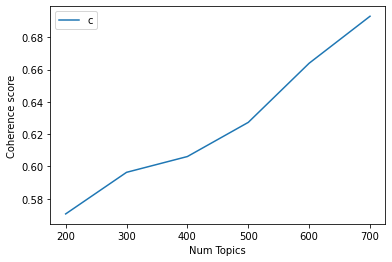

In [ ]:
limit=800; start=200; step=100;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 200  has Coherence Value of 0.5706
Num Topics = 300  has Coherence Value of 0.5963
Num Topics = 400  has Coherence Value of 0.6061
Num Topics = 500  has Coherence Value of 0.6273
Num Topics = 600  has Coherence Value of 0.6639
Num Topics = 700  has Coherence Value of 0.693


##  **MODEL REPRESENTATION**

### **DOMINANT TOPIC IN EACH SENTENCE**

In [ ]:
# DOMINANT TOPIC IN EACH SENTENCE

#This code bit focuses on calculating the percentage contribution of each topic in a document

def format_topics_sentences(ldamodel=lda, corpus=doc_term_matrix, texts=data_comp):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic','Perc_Contribution', 'Topic_Keywords']

    # Add original list of words to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=doc_term_matrix, texts=data_comp)

# Format | Column Names
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,219.0,0.7917,"111115303, 101115303, 011115303, 001006303, 11...","[001111303, 001001303, 001103303, 001003303, 1..."
1,1,111.0,0.9929,"001005379, 110117398, 011005379, 000103379, 00...","[100002307, 101002307, 010002307, 001103307, 0..."
2,2,201.0,0.5870,"010016327, 100106327, 011106298, 101005327, 00...","[011104334, 001004334, 000015334, 100005334, 0..."
3,3,41.0,0.6313,"010003433, 111116357, 100001340, 000019357, 10...","[010003495, 000013495, 001003495, 100003495, 0..."
4,4,35.0,0.6696,"111114323, 111115323, 111116323, 011115323, 11...","[000105489, 001005489, 000105489, 000016489, 0..."
5,5,29.0,0.9929,"000019444, 100006444, 111116444, 100008444, 00...","[000101444, 001001444, 000013444, 100103444, 1..."
6,6,65.0,0.9842,"100006415, 000016415, 000106415, 100006442, 00...","[010101415, 110001415, 010103415, 100003415, 0..."
7,7,165.0,0.4932,"100006398, 100001398, 000017398, 010008398, 00...","[100003435, 000013435, 000013435, 010113435, 0..."
8,8,125.0,0.5376,"000106410, 100006410, 000106372, 001006372, 00...","[010101410, 010001410, 100001410, 010103410, 0..."
9,9,231.0,0.5218,"111004323, 111119293, 000105478, 000106505, 10...","[001103483, 000103483, 001003483, 010003483, 1..."


In [ ]:
# Converting as dataframe and exporting the csv to drive
df_doctopic= pd.DataFrame(df_dominant_topic)
df_doctopic.head()
df_doctopic.to_csv('/content/drive/My Drive/PARAKEETS/dom_topic.csv',index=False)

### **REPRESENTATIVE TOPIC FOR EACH DOCUMENT**

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorted = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorted = pd.concat([sent_topics_sorted, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorted.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorted.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorted.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9902,"010005261, 010006441, 000016441, 000105441, 00...","[000011281, 000011281, 001011281, 001101281, 0..."
1,1.0,0.9860,"001006271, 000105271, 000015271, 010006271, 10...","[010001439, 000011439, 000103439, 000103439, 0..."
2,2.0,0.7872,"000017272, 000104272, 100005272, 100007276, 00...","[000103405, 010003405, 001003405, 001003405, 0..."
3,3.0,0.9804,"000017327, 000016327, 001009327, 000106327, 01...","[011101327, 001001327, 000013327, 000013327, 1..."
4,4.0,0.9918,"000017359, 000106412, 000016412, 010006359, 10...","[000013495, 000013495, 000103495, 010003495, 1..."


In [ ]:
# Converting as dataframe and exporting the csv to drive
df_tpc_contri= pd.DataFrame(sent_topics_sorted)
df_tpc_contri.head()
df_tpc_contri.to_csv('/content/drive/My Drive/PARAKEETS/topic_contri.csv',index=False)

### **TOPIC DISTRIBUTION ACROSS DOCUMENTS**

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics[:10]

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,219.0,"111115303, 101115303, 011115303, 001006303, 11...",23.0,0.0041
1.0,111.0,"001005379, 110117398, 011005379, 000103379, 00...",23.0,0.0041
2.0,201.0,"010016327, 100106327, 011106298, 101005327, 00...",3.0,0.0005
3.0,41.0,"010003433, 111116357, 100001340, 000019357, 10...",11.0,0.0020
4.0,35.0,"111114323, 111115323, 111116323, 011115323, 11...",58.0,0.0103
5.0,29.0,"000019444, 100006444, 111116444, 100008444, 00...",29.0,0.0052
6.0,65.0,"100006415, 000016415, 000106415, 100006442, 00...",1.0,0.0002
7.0,165.0,"100006398, 100001398, 000017398, 010008398, 00...",18.0,0.0032
8.0,125.0,"000106410, 100006410, 000106372, 001006372, 00...",17.0,0.0030
9.0,231.0,"111004323, 111119293, 000105478, 000106505, 10...",9.0,0.0016


In [ ]:
# Converting as dataframe and exporting the csv to drive
df_topic_doc= pd.DataFrame(df_dominant_topics)
df_topic_doc.head()
df_topic_doc.to_csv('/content/drive/My Drive/PARAKEETS/topic_doc.csv',index=False)

# **VISUALIZATION**

In [ ]:
# pyLDAvis library which is a library used for visually representing 
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.3MB/s 
     |████████████████████████████████| 552kB 18.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=5e1a00cde6278ca8de96dbcd0df9ebbcf4b1956d378793d098418867e4c3cd39
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=fdf00637de780b9932ecfa771bf3ed8b559c6e0bf94ce900792e72963768a715
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import pyLDAvis.gensim

In [ ]:
# Represent the LDA model through an intertopic distribution model
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
111     1.998634  16.469374       1        1  10.717956
29     14.123827  -0.925912       2        1   8.337332
219   -19.211727  -3.666376       3        1   8.233639
41     -1.680406   2.183953       4        1   5.123899
128   -19.076468  -3.740347       5        1   2.501439
...          ...        ...     ...      ...        ...
188     3.631380  11.625239     296        1   0.170264
187     5.718769  -3.087044     297        1   0.170264
186    -1.454958  -8.488111     298        1   0.170264
185     7.781659  -5.770639     299        1   0.170264
0     -13.825983   4.190143     300        1   0.170264

[300 rows x 5 columns], topic_info=            Term       Freq      Total  Category  logprob  loglift
13535  001005379  13.000000  13.000000   Default  30.0000  30.0000
10842  000019398   5.000000   5.000000   Default  29.0000  29.0000
3692   111115338   5.000000   5.000000   Default  28.0000  28.0000
77     111115303  11.000000  11.000000   Default  27.0000  27.0000
692    111116452   4.000000   4.000000   Default  26.0000  26.0000
...          ...        ...        ...       ...      ...      ...
22316  010007441   0.087780   0.256325  Topic300  -4.6412   5.3040
17918  001105441   0.081805   0.243750  Topic300  -4.7117   5.2838
15396  000015261   0.079936   0.376620  Topic300  -4.7348   4.8256
17939  100005441   0.078494   0.362935  Topic300  -4.7530   4.8444
17940  100007441   0.075777   0.231554  Topic300  -4.7882   5.2586

[13933 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
26708      4  0.970433  000011285
29985      3  1.005702  000011399
23467     16  1.606184  000011437
19661      2  0.979510  000011444
7539       3  0.899602  000013303
...      ...       ...        ...
6308      30  0.789200  111116478
556       24  0.614754  111116483
18185      4  0.718710  111116485
4683      13  1.360272  111117323
693       27  0.893013  111117452

[672 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[112, 30, 220, 42, 129, 244, 262, 76, 57, 90, 283, 243, 36, 269, 75, 70, 202, 248, 211, 234, 73, 177, 233, 164, 288, 120, 80, 184, 132, 153, 16, 144, 64, 162, 34, 51, 21, 161, 141, 35, 88, 114, 113, 10, 111, 110, 11, 109, 108, 107, 106, 105, 104, 12, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 13, 115, 116, 117, 5, 139, 138, 2, 137, 136, 135, 134, 133, 3, 131, 130, 4, 128, 118, 127, 126, 125, 124, 123, 6, 7, 122, 8, 121, 9, 119, 89, 87, 33, 14, 24, 25, 58, 26, 56, 55, 54, 53, 52, 27, 28, 29, 50, 49, 48, 31, 47, 46, 45, 44, 43, 32, 41, 40, 39, 38, 37, 59, 60, 61, 19, 86, 85, 84, 83, 82, 81, 15, 79, 17, 78, 77, 18, 74, 62, 20, 72, 71, 140, 22, 69, 68, 67, 66, 65, 23, 63, 300, 150, 142, 252, 245, 246, 247, 249, 250, 251, 253, 261, 254, 255, 256, 257, 258, 259, 242, 241, 240, 239, 238, 237, 236, 235, 232, 231, 230, 229, 228, 227, 226, 225, 224, 260, 263, 222, 291, 284, 285, 286, 287, 289, 290, 292, 264, 293, 294, 295, 296, 297, 298, 282, 281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 271, 270, 268, 267, 266, 265, 223, 221, 143, 172, 166, 167, 168, 169, 170, 171, 173, 182, 174, 175, 176, 178, 179, 180, 165, 163, 160, 159, 158, 157, 156, 155, 154, 152, 151, 299, 149, 148, 147, 146, 145, 181, 183, 219, 210, 204, 205, 206, 207, 208, 209, 212, 185, 213, 214, 215, 216, 217, 218, 203, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 1])